# Astroquery
Astroquery is package that provides a set of tools to query astronomical databases. In this tutorial, we will focus on the CADC package of astroquery, which queries data provided by the Canadian Astronomical Data Centre (http://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca ).

- https://github.com/astropy/astroquery

TODO: Put resources at the bottom with summaries
Resources:

- http://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/en/doc/tap/
- https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/en/search/
- https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/
- http://www.canfar.net/storage/list/CADC

TODO: Complete as much of this table as possible, then delete!

METHODS
- [X]  get_table
- [X]  get_tables
- [ ]  list_async_jobs (auth)
- [ ]  load_async_job (auth)
- [ ]  login (auth)
- [ ]  logout (auth)
- [ ]  query_async
- [X]  run_query
- [ ]  save_results

FUNCTIONS
- [X]  get_data_urls
- [ ]  list_jobs (auth)
- [ ]  load_job (auth)
- [ ]  query
- [X]  query_name
- [ ]  query_name_async (don't think this should be part of it)
- [X]  query_region
- [ ]  query_region_async (don't think this should be part of it)

TODO: Hyperlinks!!!

# Tutorial
This tutorial will go through some of the basic functionalities of the CADC astroquery package. The CADC module can be installed using the command:

`pip install --pre astroquery`

TODO: Explain installation and requirements more


(The `--pre` tag installs the pre-release version which we need because the CADC package is not in the latest release.) More information about astroquery can be found at the github repository https://github.com/astropy/astroquery.

Now, onto the tutorial. The first step is to import the CADC module from astroquery.

In [1]:
from astroquery.cadc import Cadc
cadc = Cadc()


## Querying
The CADC astroquery package queries the CADC metadata and returns the results as an astropy table. 

There are three ways to query data: query by region, query by name, and quering using TAP. The first two are more basic, while the other method involves some understanding of query languages. TAP stands for transfer access protocol (http://www.ivoa.net/documents/TAP/), and uses Astronomical Data Query Language (ADQL) to make queries.
    
There are two modes to query data: synchronous and asynchronous. 
* Synchronous queries generate a response to a request as soon as it is received by the server. These queries have a limit of 2000 rows, so it is best when retrieving a small amout of data. Also, the results of synchronous queries are not stored server side, but returned as the reponse to the query. The result of the query is an astropy table.
* Asynchronous queries, on the other hand, start a job to execute the request, so there is no risk of time outs. The response to the request is a link to the job where its status can be viewed. The results are stored server-side, so once the job status is complete, the results can be downloaded. The result of the query should be an HTTP response.


### Query by region
One of the basic ways to access CADC data is by region. We can input the coordinates (and optionally, the radius and collection source) then the query will return observations that intersect that position/area taken from the collection source. The function accepts both strings and SkyCoord objects as coordinates.


In [49]:
from astropy.coordinates import SkyCoord
from astropy import units as u

c = SkyCoord(ra=127.5, dec=4.3, frame='icrs', unit='deg')

# PROBLEM: query_region does not accept `astropy.units.Quantity` as in the docs.
result = cadc.query_region(c, radius=0.5, collection='HST') # HST short for Hubble Space Telescope
print("Number of results: {}".format(len(result)))

Number of results: 75


The next example queries a region, then further filters the results by restricting the target to 'Nr3491_1'.

TODO: Find out what 'Nr3491_1' is

In [52]:
result = cadc.query_region('08h45m07.5s +54d18m00s')
print("Number of results before filtering: {}".format(len(result)))

result = result[result['target_name'] == 'Nr3491_1']
print("Number of results after filtering: {}".format(len(result)))

print(result)

Number of results before filtering: 663
Number of results after filtering: 2
caomObservationURI sequenceNumber ...      lastModified_2    
                                  ...                        
------------------ -------------- ... -----------------------
 caom:CFHT/2376828        2376828 ... 2019-03-04T08:14:46.470
 caom:CFHT/2376828        2376828 ... 2019-04-10T22:14:33.111


#### Accessing the data

TODO: Find a good spot for this information

We can retreive urls to the actual data that results from the query. The `get_url_data` function uses the IVOA DataLink Service (http://www.ivoa.net/documents/DataLink/ ) implemented at the CADC. It works directly with the results produced by the `query_region` and `query_name` functions, but in principle it can work with other query results produced with the Cadc query as long as the results contain the `caomPublisherID` column. This column is part of the `caom2.Plane table`. 


In [53]:
urls = cadc.get_data_urls(results)
[print(url) for url in urls];

https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/MAST/HST/product/jdrw5p010_drc.fits?RUNID=b4kpqox5xrat5ada
https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/MAST/HST/product/jdrw5p010_drz.fits?RUNID=b4kpqox5xrat5ada


### Query by object
Lets say we want to get data about the Andromeda Galaxy, which is also known as `M31`. We would use the `query_name` function to retreive data that _contains_ `M31` in an observation's `target_name`.

In [47]:
result = cadc.query_name('M31')
print("Number of results: {}".format(len(result)))
print("Number of columns: {}".format(len(result.columns)))

Number of results: 2000
Number of columns: 109


That is a huge number of columns to show. Let's print out the column names and select a few that we want to display.

In [25]:
[print(colname) for colname in result.colnames];


caomObservationURI
sequenceNumber
proposal_keywords
target_standard
target_redshift
target_moving
target_keywords
targetPosition_equinox
targetPosition_coordinates_cval1
targetPosition_coordinates_cval2
telescope_geoLocationX
telescope_geoLocationY
telescope_geoLocationZ
telescope_keywords
instrument_keywords
environment_seeing
environment_humidity
environment_elevation
environment_tau
environment_wavelengthTau
environment_ambientTemp
environment_photometric
members
typeCode
metaChecksum
obsID
accMetaChecksum
collection
observationID
algorithm_name
type
intent
metaRelease
proposal_id
proposal_pi
proposal_project
proposal_title
target_name
target_type
targetPosition_coordsys
telescope_name
requirements_flag
instrument_name
lastModified
maxLastModified
caomPlaneURI
caomPublisherID
calibrationLevel
provenance_keywords
provenance_inputs
metrics_sourceNumberDensity
metrics_background
metrics_backgroundStddev
metrics_fluxDensityLimit
metrics_magLimit
position_bounds
position_bounds_samples
p

Alright, lets look at `caomObservationURI`, `typeCode`, `type`, `intent`, `target_name`, `telescope_name`, `instrument_name`, and `lastModified`. We can grab information about the columns using the `info` property.

In [7]:
columns_subset = ['caomObservationURI', 'typeCode', 'type', 'intent', 'target_name', 
       'telescope_name', 'instrument_name', 'lastModified']

result[columns_subset].info


<Table masked=True length=2000>
       name         dtype                                      description                                    
------------------ ------- -----------------------------------------------------------------------------------
caomObservationURI  object                                                     unique URI for this observation
          typeCode  bytes1 single character code to denote type: S(impleObservation) or C(ompositeOvservation)
              type bytes32                                   type of data collected (e.g. FITS OBSTYPE header)
            intent bytes32                             intended purpose of data (one of: science, calibration)
       target_name bytes32                                                             name of intended target
    telescope_name bytes32                                       name of telescope used to acquire observation
   instrument_name bytes32                                      name of instrume

We can also print out the results in a nice table using `show_in_notebook`.

In [8]:
result[columns_subset].show_in_notebook()


idx,caomObservationURI,typeCode,type,intent,target_name,telescope_name,instrument_name,lastModified
0,caom:HST/ibfb16i3q,S,IMAGING,science,M31-B05-F16-IR,HST,WFC3/IR,2019-05-10T13:55:34.475
1,caom:HST/ibfb16i3q,S,IMAGING,science,M31-B05-F16-IR,HST,WFC3/IR,2019-05-10T13:55:34.475
2,caom:HST/ibfb13prq,S,IMAGING,science,M31-B05-F13-IR,HST,WFC3/IR,2019-05-10T14:01:03.320
3,caom:HST/ibfb13prq,S,IMAGING,science,M31-B05-F13-IR,HST,WFC3/IR,2019-05-10T14:01:03.320
4,caom:HST/ibfd01drq,S,IMAGING,science,M31-B08-F01-IR,HST,WFC3/IR,2019-05-10T13:55:28.371
5,caom:HST/ibfd01drq,S,IMAGING,science,M31-B08-F01-IR,HST,WFC3/IR,2019-05-10T13:55:28.371
6,caom:HST/ibfb15t1q,S,IMAGING,science,M31-B05-F15-IR,HST,WFC3/IR,2019-05-10T13:56:47.864
7,caom:HST/ibfb15t1q,S,IMAGING,science,M31-B05-F15-IR,HST,WFC3/IR,2019-05-10T13:56:47.864
8,caom:HST/ibfb15t1q,S,IMAGING,science,M31-B05-F15-IR,HST,WFC3/IR,2019-05-10T13:56:47.864
9,caom:HST/ibfb13pkq,S,IMAGING,science,M31-B05-F13-IR,HST,WFC3/IR,2019-05-10T14:01:49.426


So now we have a list of observations that satisfy our inital query, as well as some information about each observation. Now we can further filter our results such that `type` is IMAGING and `intent` is science.


In [12]:
filter_mask = ((result['type'] == 'IMAGING') & (result['intent'] == 'science'))
filtered_results = result[filter_mask]

print(len(filtered_results))


1123


### Query using TAP
You can query tap with or without authentication. You need authentication to access TAP+ capabilities (share tables, persistent jobs, etc.), but we will get to that later.

TODO: Get to that later

#### CADC Data Structure
In order to query the database, it is important to have an understanding of the layout. The data is stored in the Common Archive Observation Model (CAOM2) format. It is a database with tables describing the circumstance of an observation, the nature of an observation, and the processing level of different files associated with the observation (http://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/en/doc/caom/ ).

First, let's take a look at how the database is organized and print the names of all the tables.


In [75]:
tables = cadc.get_tables()

[print(table.get_qualified_name()) for table in tables];

Retrieving tables...
Parsing tables...
Done.
caom2.caom2.Observation
caom2.caom2.Plane
caom2.caom2.Artifact
caom2.caom2.Part
caom2.caom2.Chunk
caom2.caom2.ObservationMember
caom2.caom2.ProvenanceInput
caom2.caom2.EnumField
caom2.caom2.ObsCoreEnumField
caom2.caom2.distinct_proposal_id
caom2.caom2.distinct_proposal_pi
caom2.caom2.distinct_proposal_title
caom2.caom2.HarvestSkipURI
caom2.caom2.SIAv1
ivoa.ivoa.ObsCore
ivoa.ivoa.ObsFile
ivoa.ivoa.ObsPart
tap_schema.tap_schema.schemas
tap_schema.tap_schema.tables
tap_schema.tap_schema.columns
tap_schema.tap_schema.keys
tap_schema.tap_schema.key_columns


We can also fetch a single table to have a look at the columns.

In [16]:
# To fetch a single table object
table = cadc.get_table(table='caom2.caom2.Observation')

[print(col.name) for col in table.columns];


Retrieving tables...
Parsing tables...
Done.
observationURI
obsID
collection
observationID
algorithm_name
type
intent
sequenceNumber
metaRelease
proposal_id
proposal_pi
proposal_project
proposal_title
proposal_keywords
target_name
target_type
target_standard
target_redshift
target_moving
target_keywords
targetPosition_coordinates_cval1
targetPosition_coordinates_cval2
targetPosition_coordsys
targetPosition_equinox
telescope_name
telescope_geoLocationX
telescope_geoLocationY
telescope_geoLocationZ
telescope_keywords
requirements_flag
instrument_name
instrument_keywords
environment_seeing
environment_humidity
environment_elevation
environment_tau
environment_wavelengthTau
environment_ambientTemp
environment_photometric
members
typeCode
lastModified
maxLastModified
metaChecksum
accMetaChecksum


#### ADQL
ADQL is the query language used for accessing the CADC databases (http://www.ivoa.net/documents/ADQL/2.0). To make a query using ADQL, we SELECT the columns we want FROM one or multiple tables WHERE a condition is met. For example, say we want to look at the `observationID`, `intent`, and `target_name` columns from the observation table, this would translate to `SELECT observationID, intent, target_name FROM caom2.Observation` in ADQL. 

#### Running a synchronous query

Let's run the query synchronously and see the results. Remember, synchronous queries return the results with a limit of 2000 rows.

In [34]:
query = "SELECT observationID, intent, target_name FROM caom2.Observation"
job = cadc.run_query(query, 'sync')
results = job.get_results()

results.show_in_notebook()

idx,observationID,intent,target_name
0,HSCA06658200,calibration,DOMEFLAT
1,HSCA06658400,calibration,DOMEFLAT
2,HSCA06658600,calibration,DOMEFLAT
3,HSCA06658800,calibration,DOMEFLAT
4,HSCA06659000,calibration,DOMEFLAT
5,HSCA06659200,calibration,DOMEFLAT
6,HSCA06659400,calibration,DOMEFLAT
7,HSCA06659600,calibration,DOMEFLAT
8,HSCA06661000,calibration,BIAS
9,HSCA06661200,calibration,BIAS


We can also save results from a query to a file. Output format can be of types 'csv', 'tsv' and 'votable'. Now lets select the observation ID, instrument name, and image position bounds from the observation and plane data tables, where the instrument is the SCUBA-2 telescope.

In [23]:
query = "SELECT Observation.observationID, Observation.instrument_name, Plane.position_bounds " + \
    "FROM caom2.Plane AS Plane JOIN caom2.Observation AS Observation ON Plane.obsID = Observation.obsID " + \
    "WHERE Observation.instrument_name = 'SCUBA-2'"
cadc.run_query(query, 'sync', output_file='test_output.tsv', output_format='tsv')


If you have a table you want to query thats not hosted by CADC, you can also upload and query it.

In [35]:
#TODO: Upload table!!!
upload_resource = 'data/votable.xml'
job = cadc.run_query("SELECT * FROM tap_upload.test_table_upload", 'sync', \
                  upload_resource=upload_resource, upload_table_name="test_table_upload")

print(job.get_results())


FileNotFoundError: [Errno 2] No such file or directory: 'data/votable.xml'

### Asyncronous query
 Asynchronous queries results at server side. The queries can be accessed any time. As with synchronous queries, the results can be saved in memory (default) or in a file.

In [24]:
#TODO: Reprt 'bug'
query = "SELECT observationID, instrument_name, target_name FROM caom2.Observation AS Observation"
job = cadc.run_query(query, 'async', verbose=True)
print(job)

Launched query: 'SELECT observationID, instrument_name, target_name FROM caom2.Observation AS Observation'
303 See Other
[('Date', 'Fri, 10 May 2019 17:11:08 GMT'), ('Strict-Transport-Security', 'max-age=0'), ('Location', 'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/tap//async/zcj5g89mo0waw2lb'), ('Content-Length', '0'), ('Vary', 'Origin'), ('Connection', 'close'), ('Content-Type', 'text/plain')]
303 See Other
[('Date', 'Fri, 10 May 2019 17:11:08 GMT'), ('Strict-Transport-Security', 'max-age=0'), ('Location', 'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/tap//async/zcj5g89mo0waw2lb'), ('Content-Length', '0'), ('Vary', 'Origin'), ('Connection', 'close'), ('Content-Type', 'text/plain')]
job zcj5g89mo0waw2lb, at: https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/tap//async/zcj5g89mo0waw2lb


Exception: Not Found

In [39]:
job = cadc.query_name_async('M') # Not actually async?

print(job.get_results())

         caomObservationURI          sequenceNumber ...      lastModified_2    
                                                    ...                        
------------------------------------ -------------- ... -----------------------
                  caom:NOAO/tu779632             -- ... 2017-12-18T10:25:57.339
                 caom:NOAO/tu1050872             -- ... 2017-12-18T10:25:57.615
                  caom:NOAO/tu779635             -- ... 2017-12-18T10:25:57.909
    caom:NOAO/c13a_061001_175811_fri             -- ... 2017-12-18T10:25:57.913
                 caom:NOAO/kp1536503             -- ... 2017-12-18T10:25:58.075
                 caom:NOAO/tu1428449             -- ... 2017-12-18T10:25:58.408
                  caom:NOAO/tu779629             -- ... 2017-12-18T10:25:58.483
    caom:NOAO/c13a_061001_175902_fri             -- ... 2017-12-18T10:25:58.591
    caom:NOAO/c13a_061001_175944_fri             -- ... 2017-12-18T10:25:59.185
                  caom:NOAO/tu779637    

In [42]:

# TODO: include_auxilaries in get_data_urls
query = "SELECT * " + \
    "FROM caom2.Plane AS Plane JOIN caom2.Observation AS Observation ON Plane.obsID = Observation.obsID " + \
    "WHERE (Observation.observationID = 'jdrw5p010' AND Plane.calibrationLevel = 3)"

job = cadc.run_query(query, 'sync')
results = job.get_results()

urls = cadc.get_data_urls(results)
[print(url) for url in urls];

https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/MAST/HST/product/jdrw5p010_drc.fits?RUNID=b4kpqox5xrat5ada
https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/MAST/HST/product/jdrw5p010_drz.fits?RUNID=b4kpqox5xrat5ada


In [40]:
cadc.list_async_jobs()

Forbidden


## Some Extra Stuff

Now that we have some data, lets make a histogram of target_names!

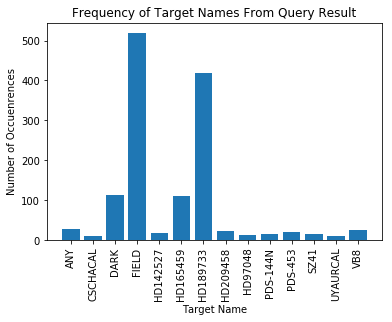

In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

query = "SELECT observationID, intent, target_name FROM caom2.Observation"
job = cadc.run_query(query, 'sync')
results = job.get_results()

target_names, counts = np.unique(results['target_name'], return_counts=True)

# Remove all counts of less than 5 - otherwise too much data
mask = counts >=10
filtered_target_names = target_names[mask]
filtered_counts = counts[mask]

indices = np.arange(len(filtered_target_names))
plt.bar(indices, filtered_counts)
plt.title('Frequency of Target Names From Query Result')
plt.ylabel('Number of Occuenrences')
plt.xlabel('Target Name')
plt.xticks(range(len(filtered_target_names)), labels=filtered_target_names, rotation='vertical');

type of data component
- SCI (science image)
- ERR (error image)
- DQ (data quality image)
- SAMP1 (number of sample)
- TIME1 (exposure time)
- EVENTS2 (photon event list)
- GTI2 (good time interval)
- WHT (weight image)
- CTX (context image)

In [111]:
from astropy.io import fits

with fits.open(urls[0]) as hdu_file:
    hdu_file.info()
    image_data = hdu_file[1].data

Filename: /home/badune/.astropy/cache/download/py3/6307a17108765ccf8d77a6043bf6f1c0
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     781   ()      
  1  SCI           1 ImageHDU        77   (4217, 4245)   float32   
  2  WHT           1 ImageHDU        46   (4217, 4245)   float32   
  3  CTX           1 ImageHDU        39   (4217, 4245)   int32   
  4  HDRTAB        1 BinTableHDU    631   4R x 311C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 4A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, D, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 4A, L, D, D, D, 3A, 1A, K, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 11A, 9A, 8A, D, D, L, 4A, 18A, 3A, K, 7A, 5A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 6A, D, 3A, 6A, K, D,

In [121]:
# TODO: Can probably delete
print('Min:', np.nanmin(image_data))
print('Max:', np.nanmax(image_data))
print('Mean:', np.nanmean(image_data))
print('Stdev:', np.nanstd(image_data))


Min: -0.19443862
Max: 382.21207
Mean: 0.019526638
Stdev: 0.98123103


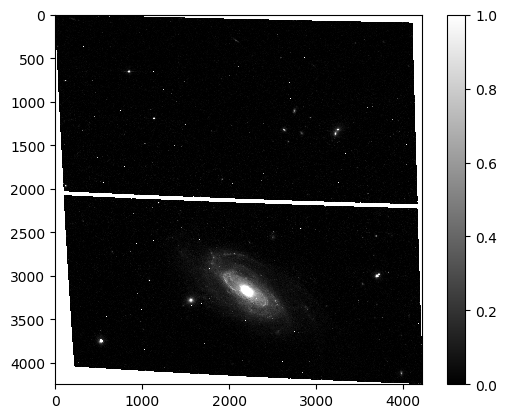

In [122]:
plt.imshow(image_data, vmin=0, vmax=1, cmap='gray')
plt.colorbar()
